In [2]:
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from astropy.time import Time
from pyrsimg import readTiff, imgShow
import pandas as pd

In [3]:
path_atl13 = 'E:/icesat2_data/icesat2/py/data2022/processed_ATL13_20220125214246_05291401_006_01.h5'
path_rsimg = 'F:/Users/86182/Desktop/dianchi_s2_20200511_wgs84_resam50m.tif'

In [4]:
!h5ls $path_atl13/qf_bckgrd

qf_bckgrd  **NOT FOUND** 


In [25]:
def gps2dyr(gps_seconds):
    time_gps=Time(gps_seconds,format='gps')
    time_dyr=Time(time_gps,format='decimalyear').value
    return time_dyr


In [26]:
with h5py.File(path_atl13,'r') as setp_atl13:
    #gt1l
    lat_gt1l=setp_atl13 ['gt1l/bottom_lat'][:]
    lon_gt1l=setp_atl13['gt1l/bottom_lon'][:]
    ht_gt1l=setp_atl13['gt1l/ht_ortho'][:]
    time_delta_sdp=setp_atl13['gt1l/delta_time'][:]
    time_delta_sdp_gps=setp_atl13['ancillary_data/atlas_sdp_gps_epoch'][:]
    #quality
    # qual_gt1l=setp_atl13['quality_assessment/qa_granule_pass_fail']
    #orbit information
    cycle=setp_atl13['orbit_info/cycle_number'][0]
    track=setp_atl13['orbit_info/rgt'][0]
    orient=setp_atl13['orbit_info/sc_orient'][0]
    #remote sensing image
rsimg=readTiff(path_rsimg)




In [27]:
seconds_gps=time_delta_sdp+time_delta_sdp_gps
seconds_gps
time_dyr=gps2dyr(seconds_gps)
time_dyr 

array([2022.06842459, 2022.06842459, 2022.06842459, 2022.06842459,
       2022.06842459, 2022.06842459, 2022.06842459, 2022.06842459,
       2022.06842459, 2022.06842459, 2022.06842459, 2022.06842459,
       2022.06842459, 2022.06842459, 2022.06842459, 2022.06842459,
       2022.06842459, 2022.06842459, 2022.06842459, 2022.06842459,
       2022.06842459, 2022.06842459, 2022.06842459, 2022.06842459,
       2022.06842459, 2022.06842459, 2022.06842459, 2022.06842459,
       2022.06842459, 2022.06842459, 2022.06842459, 2022.06842459,
       2022.06842459, 2022.06842459, 2022.06842459, 2022.06842459,
       2022.06842459, 2022.06842459, 2022.06842459, 2022.06842459,
       2022.06842459, 2022.06842459, 2022.06842459, 2022.06842459,
       2022.06842459, 2022.06842459, 2022.06842459, 2022.06842459,
       2022.06842459, 2022.06842459, 2022.06842459, 2022.06842459,
       2022.06842459, 2022.06842459, 2022.06842459, 2022.06842459,
       2022.06842459, 2022.06842459, 2022.06842459, 2022.06842

In [28]:
# good_gt1l=qual_gt1l==0
# lat_gt1l_filter,lon_gt1l_filter,ht_gt1l_filter=lat_gt1l[good_gt1l],lon_gt1l[good_gt1l],ht_gt1l[good_gt1l]
# print(lat_gt1l.shape)
# print(lat_gt1l_filter.shape)
# print(lon_gt1l.shape)
# print(lon_gt1l_filter.shape)
# print(ht_gt1l.shape)
# print(ht_gt1l_filter.shape)


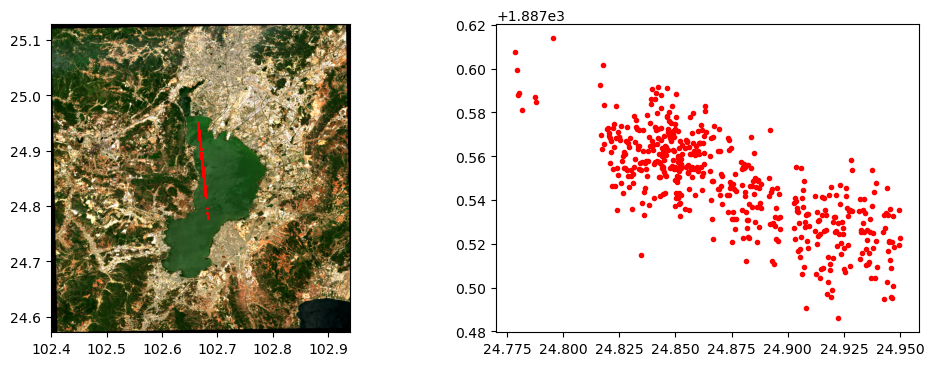

1887.5479

In [29]:
#gt1l
ids=np.where((lat_gt1l>24.50)&(lat_gt1l<24.95)&(lon_gt1l>102.00)&(lon_gt1l<103.00)&(ht_gt1l<5000))
# ids_filter=np.where((lat_gt1l_filter>24.50)&(lat_gt1l_filter<24.95)&(lon_gt1l_filter>102.00)&(lon_gt1l_filter<103.00)&(ht_gt1l_filter<5000))
fig,ax=plt.subplots(1,2,figsize=(12,4))
imgShow(rsimg.array,extent=rsimg.geoextent,clip_percent=5,ax=ax[0])
ax[0].scatter(x=lon_gt1l[ids],y=lat_gt1l[ids],s=1,color='red')
# ax[0].scatter(x=lon_gt1l_filter[ids_filter],y=lat_gt1l_filter[ids_filter],s=0.5,color='green')
ax[1].plot(lat_gt1l[ids],ht_gt1l[ids],'r.')
# ax[1].plot(lat_gt1l_filter[ids_filter],ht_gt1l_filter[ids_filter],'g.')
plt.show()
ht_gt1l[ids].mean()


